# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/ga-students/DAT-NYC-30/blob/master/homework/hw1/titanic_dropna.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
titanic = pd.read_csv('../data/titanic_dropna.csv', index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [2]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic['Survived']

## Step 3: Split the data into test/train, add CV and standardize features

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [4]:
# 10 cross validation iterations with 20% test / 80% train
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

[Logistic Regression Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

### Parameters to tune for Logistic Regression:

- penalty: 'l1' for lasso, 'l2' for ridge
- C: smaller values imply higher regularization and therefore more robustness against overfitting but potentially weaker predictions

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)

In [7]:
logreg.fit(X_train_std, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.75741786796524291), ('Parch', 0.2068300319069265)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [8]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test_std)

In [9]:
# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.707865168539


# Now it's your turn!

In [10]:
# how will you decide which features to use?

I will drop Cabin since too much is missing. I will drop Ticket since I am not sure how to learn from the ticket number. To select the rest of the features, Ridge will take care of that for us by giving us coefficients close to 0 for features that aren't very helpful in predicting survival. Another way to accomplish this could be to run Lasso first and remove any coefficients that =0.

In [11]:
# tune your model using cross-validation

In [12]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null object
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       183 non-null object
Embarked    712 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [13]:
titanic['Sex'] = pd.Categorical(titanic['Sex'])
titanic['Embarked'] = pd.Categorical(titanic['Embarked'])

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Name        712 non-null object
Sex         712 non-null category
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Ticket      712 non-null object
Fare        712 non-null float64
Cabin       183 non-null object
Embarked    712 non-null category
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 57.1+ KB


In [15]:
feature_cols = ['Pclass', 'Parch', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
X = titanic[feature_cols]
y = titanic['Survived']

In [16]:
# we need numerical data for the features
X.head()

,Pclass,Parch,Sex,Age,SibSp,Fare,Embarked
PassengerId,,,,,,,
1,3,0,male,22.0,1,7.2500,S
2,1,0,female,38.0,1,71.2833,C
3,3,0,female,26.0,0,7.9250,S
4,1,0,female,35.0,1,53.1000,S
5,3,0,male,35.0,0,8.0500,S


In [17]:
# use get_dummies to convert categoricals into binary features
pd.get_dummies(X)

,Pclass,Parch,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,0,22.0,1,7.2500,0.0,1.0,0.0,0.0,1.0
2,1,0,38.0,1,71.2833,1.0,0.0,1.0,0.0,0.0
3,3,0,26.0,0,7.9250,1.0,0.0,0.0,0.0,1.0
4,1,0,35.0,1,53.1000,1.0,0.0,0.0,0.0,1.0
5,3,0,35.0,0,8.0500,0.0,1.0,0.0,0.0,1.0
7,1,0,54.0,0,51.8625,0.0,1.0,0.0,0.0,1.0
8,3,1,2.0,3,21.0750,0.0,1.0,0.0,0.0,1.0
9,3,2,27.0,0,11.1333,1.0,0.0,0.0,0.0,1.0
10,2,0,14.0,1,30.0708,1.0,0.0,1.0,0.0,0.0


In [18]:
# we don't need both male and female columns, so we use drop_first
X = pd.get_dummies(X, drop_first=True)

In [19]:
# experimentation setup
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [20]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# gridsearch for hyperparameters
# the parameters we want to search in a dictionary
# use the parameter name from sklearn as the key
# and the possible values you want to test as the values
parameters = {'C': np.linspace(1e-5, 1e5, 100), 'class_weight': [None, 'balanced']}
logreg2 = LogisticRegression()           
clf = GridSearchCV(logreg2, parameters, cv=cv)
clf.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   1.01010e+03, ...,   9.89899e+04,   1.00000e+05]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [21]:
clf.best_params_

{'C': 1010.1010199999999, 'class_weight': 'balanced'}

In [22]:
clf.best_score_

0.78878504672897198

In [23]:
best_log = clf.best_estimator_

In [24]:
# what's the performance of your tuned model on the test set?

In [25]:
best_log.score(X_test_std, y_test)

0.7696629213483146

In [26]:
# which features seem to be helpful in predicting survival?

In [27]:
X_train.head()

,Pclass,Parch,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
454,1,0,49.0,1,89.1042,1.0,0.0,0.0
813,2,0,35.0,0,10.5000,1.0,0.0,1.0
450,1,0,52.0,0,30.5000,1.0,0.0,1.0
147,3,0,27.0,0,7.7958,1.0,0.0,1.0
881,2,1,25.0,0,26.0000,0.0,0.0,1.0


In [28]:
# coefficients close to 0 aren't very helpful
pd.DataFrame({'features': X.columns, 'coefficients': best_log.coef_[0]})

,coefficients,features
0,-0.890691,Pclass
1,-0.128673,Parch
2,-0.676187,Age
3,-0.366679,SibSp
4,0.180398,Fare
5,-1.229802,Sex_male
6,-0.177077,Embarked_Q
7,-0.091147,Embarked_S


In [29]:
np.exp(-0.676)

0.50864751868031366

In [30]:
# give an interpretation of the coefficients in your own words

A standard deviation increase of 1 for age results in about a 50% reduction to the odds of survival

In [31]:
# is your performance "good"? come up with a reasonable minimum performance level

In [32]:
# accuracy if we just did "majority vote"
y_test.value_counts().head(1) / len(y_test)

0    0.573034
Name: Survived, dtype: float64

In [33]:
import matplotlib.pyplot as plt
from sk_modelcurves.learning_curve import draw_learning_curve
%matplotlib inline

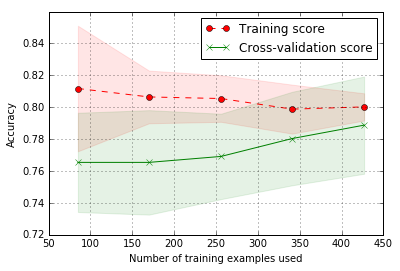

In [34]:
draw_learning_curve(best_log, X_train_std, y_train, scoring='accuracy', cv=cv);

In [35]:
# is your model overfitting or underfitting


We have some variance (which causes overfitting) as we see increased performance as we increase the amount of training examples. However, we also have a decent amount of bias coming from logistic regression, as even our training score can't reach near 100%. This is most likely due to noise in the data.